In [2]:
import os
import glob
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import colorcet as cc
import xarray as xr
import cartopy.crs as ccrs
from matplotlib.animation import FuncAnimation
import regionmask
mpl.rcParams['font.size']=22

In [3]:
os.chdir('/gpfs/fs1/p/acom/acom-da/COVID/f.e22.FCnudged.f09_f09_mg17.cams5/H0')

ar6 = regionmask.defined_regions.ar6.all
#print(ar6)
land = regionmask.defined_regions.natural_earth_v5_0_0.land_110


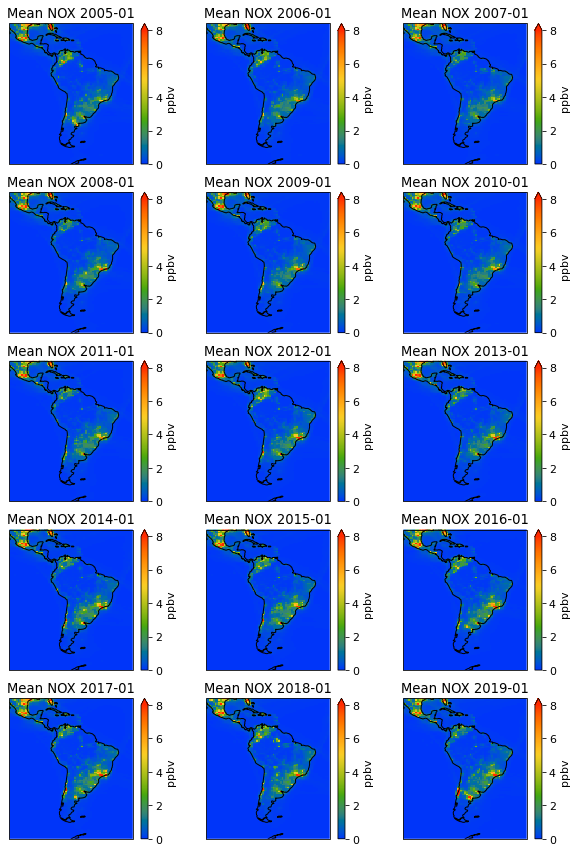

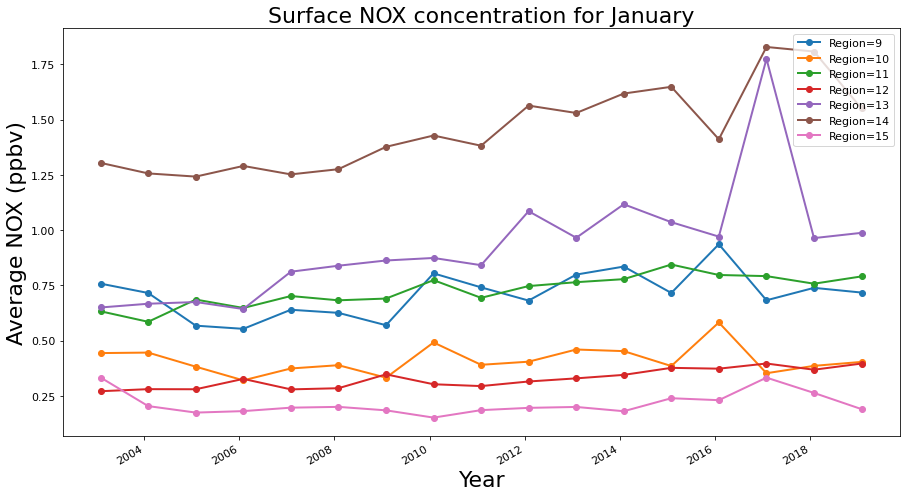

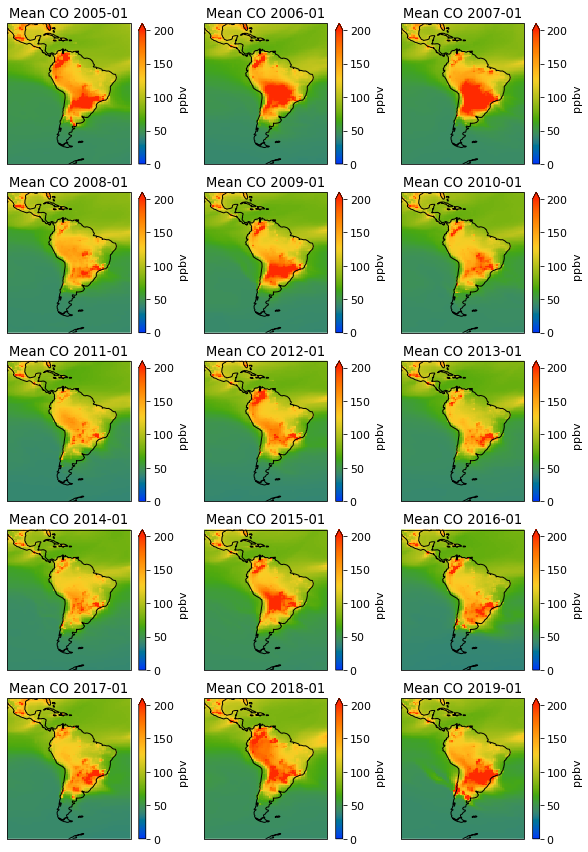

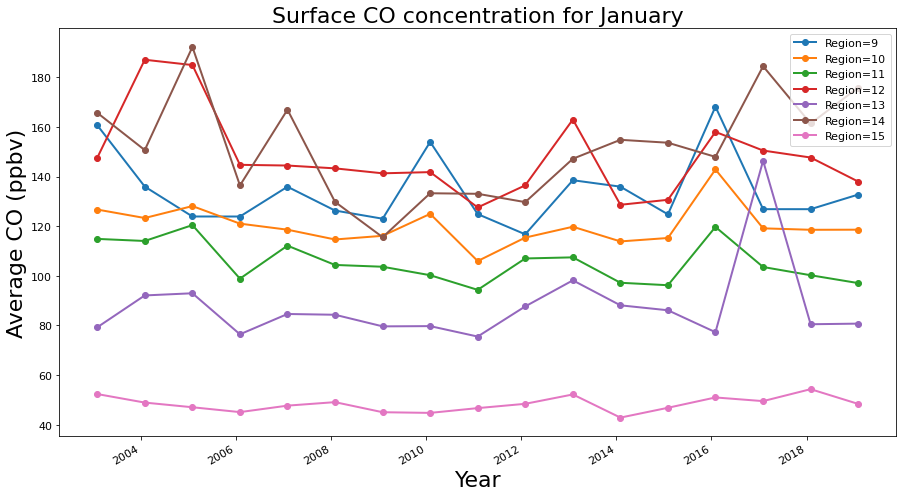

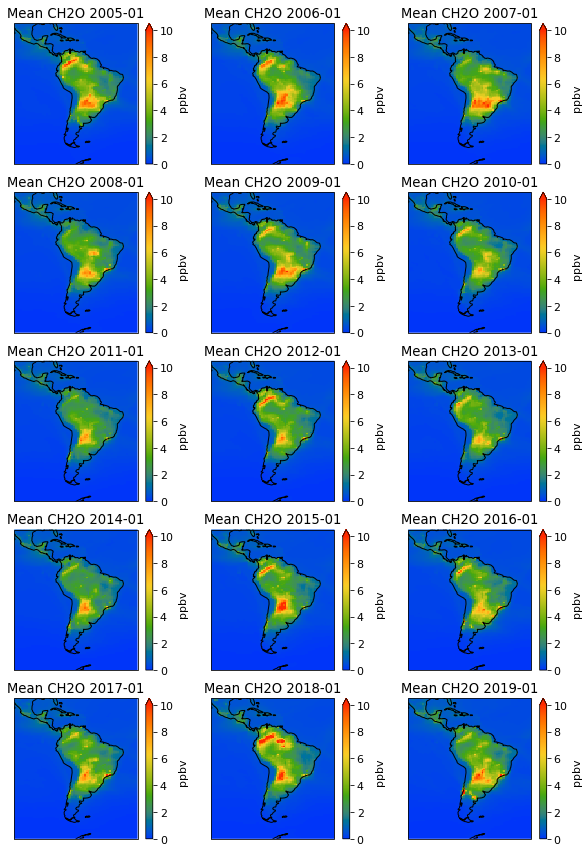

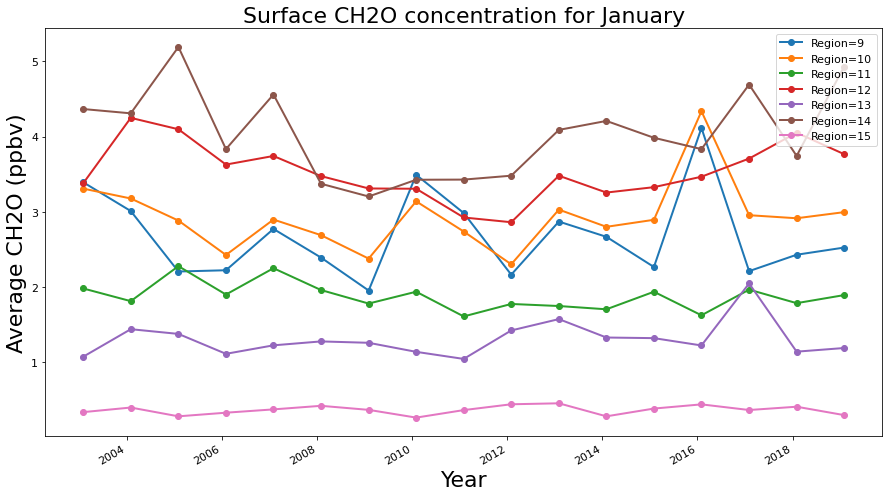

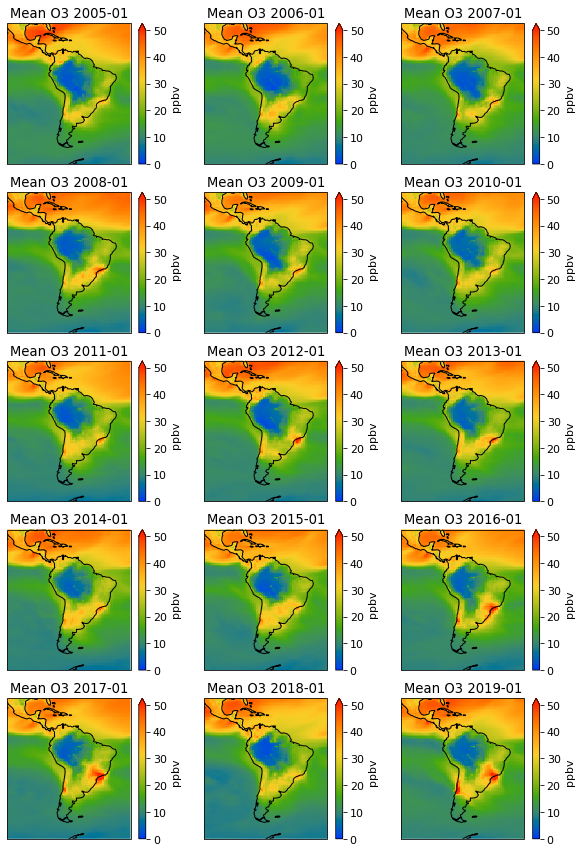

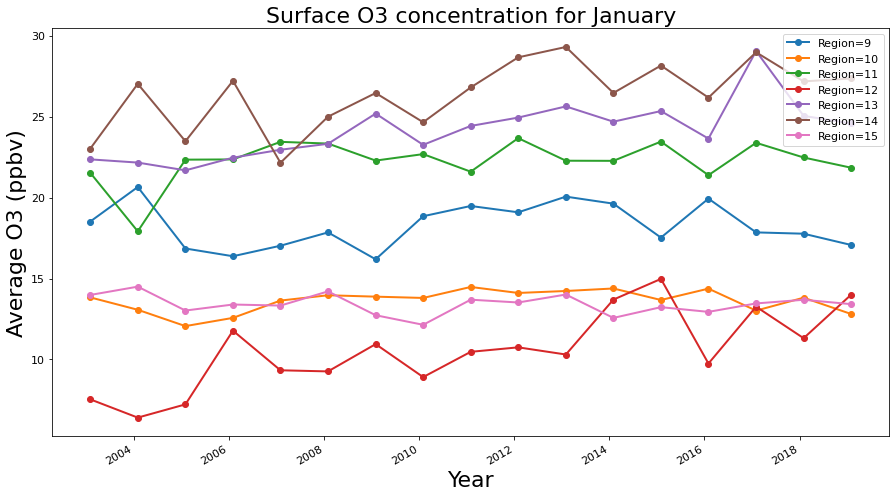

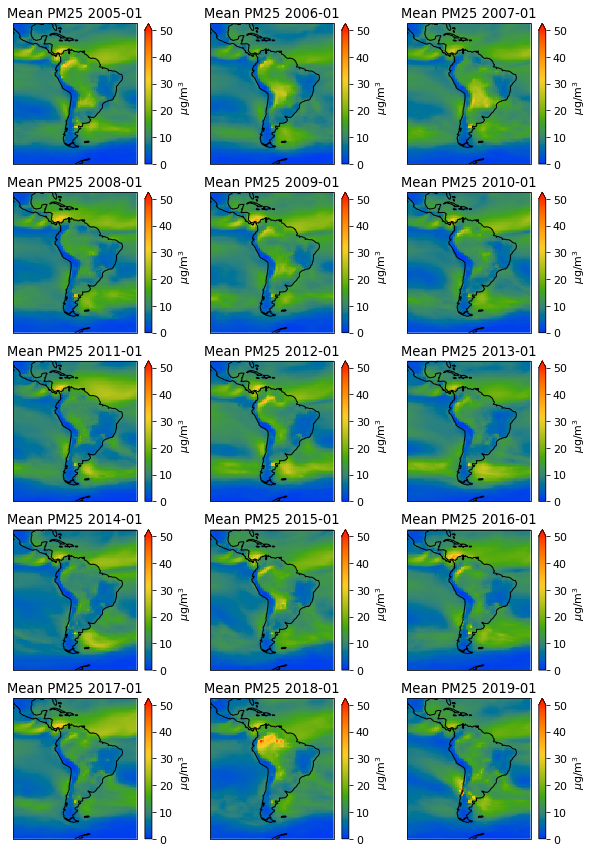

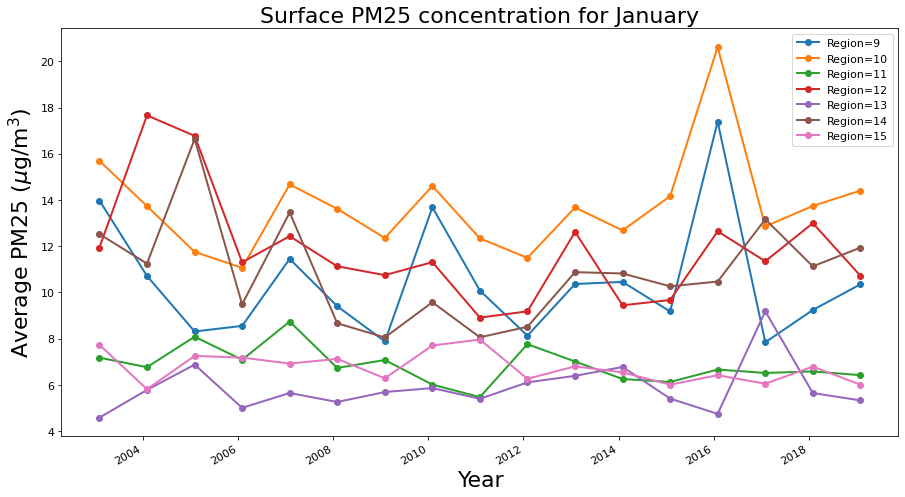

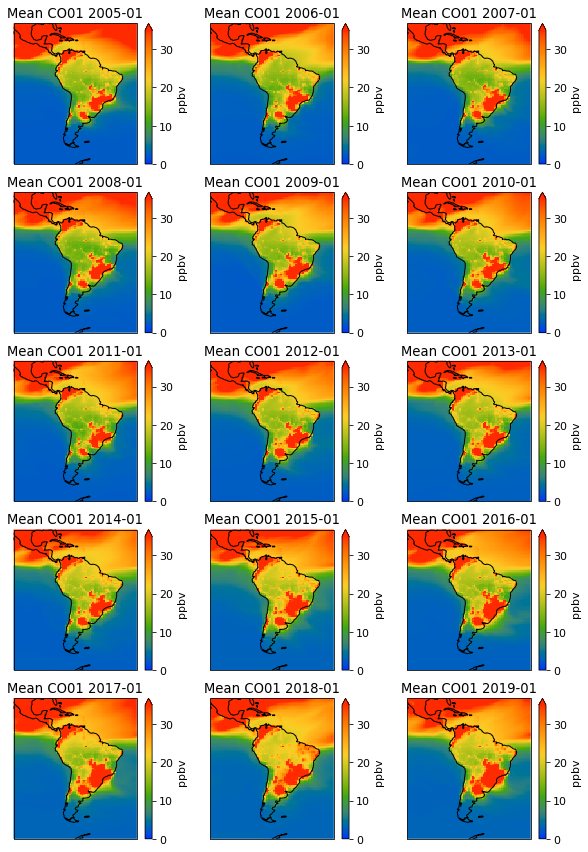

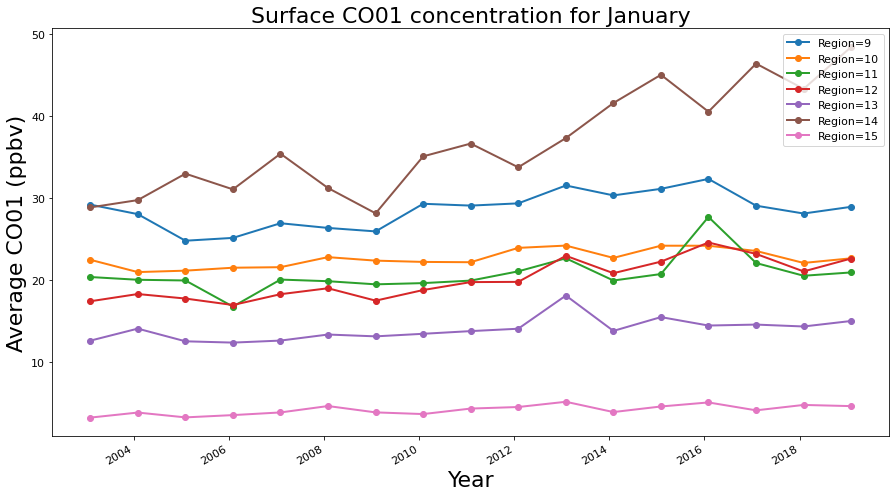

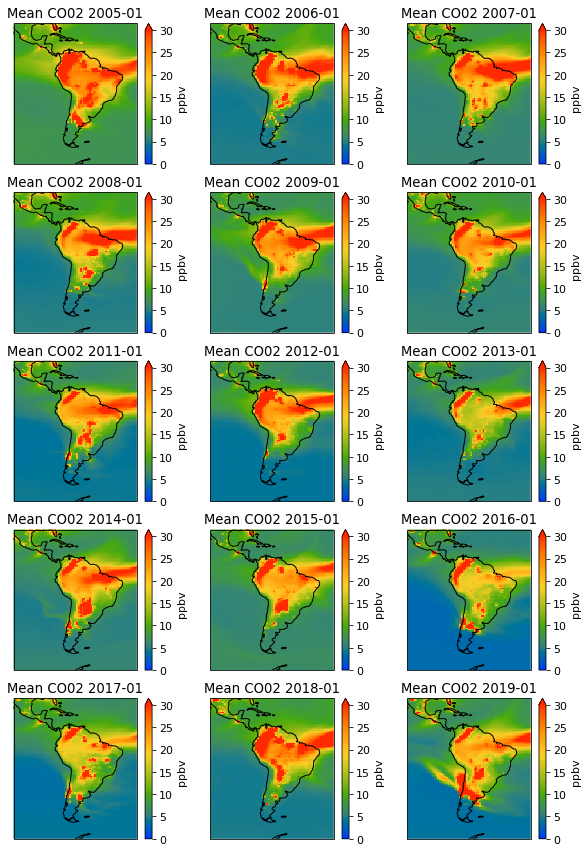

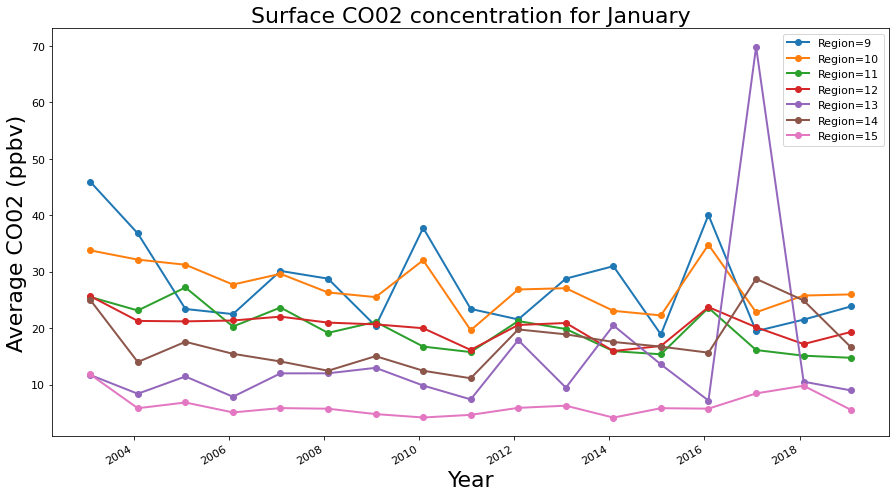

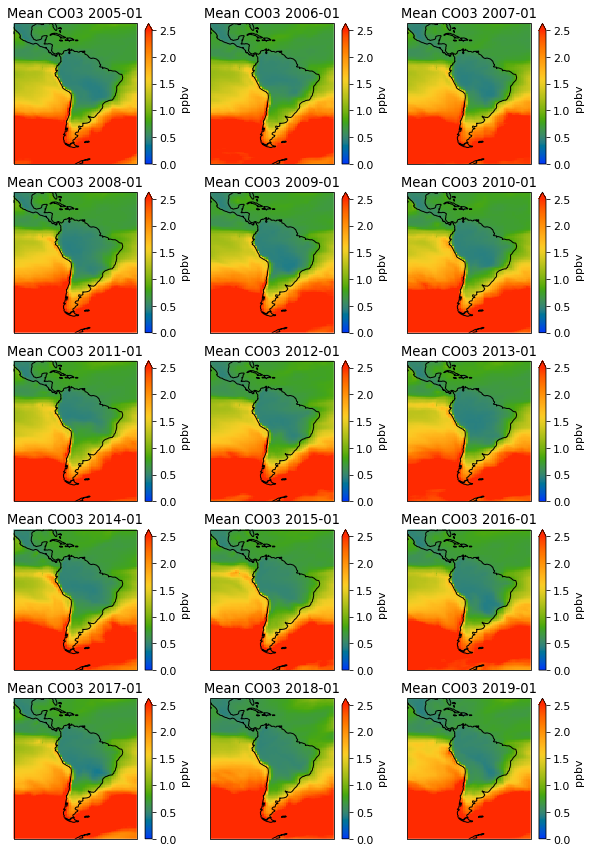

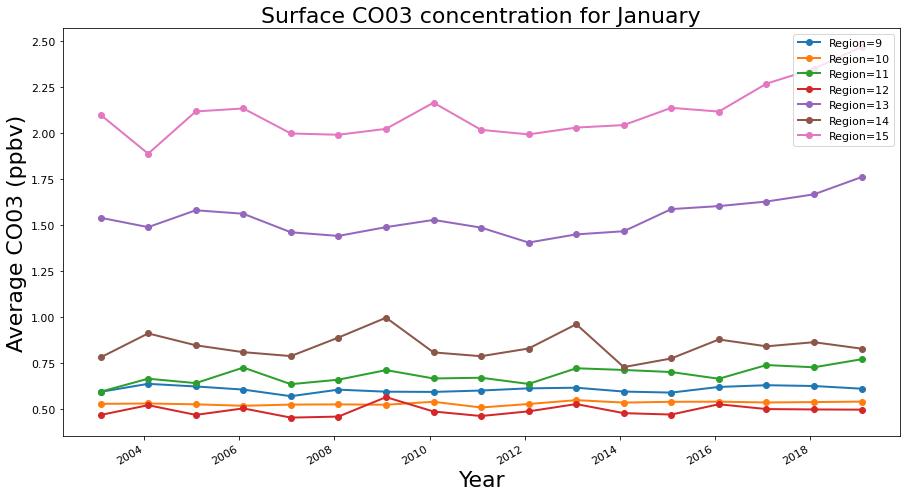

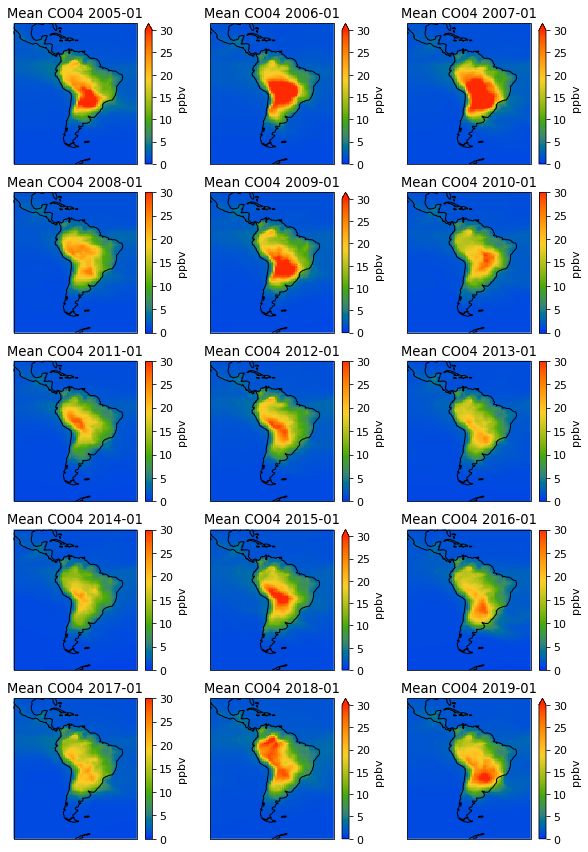

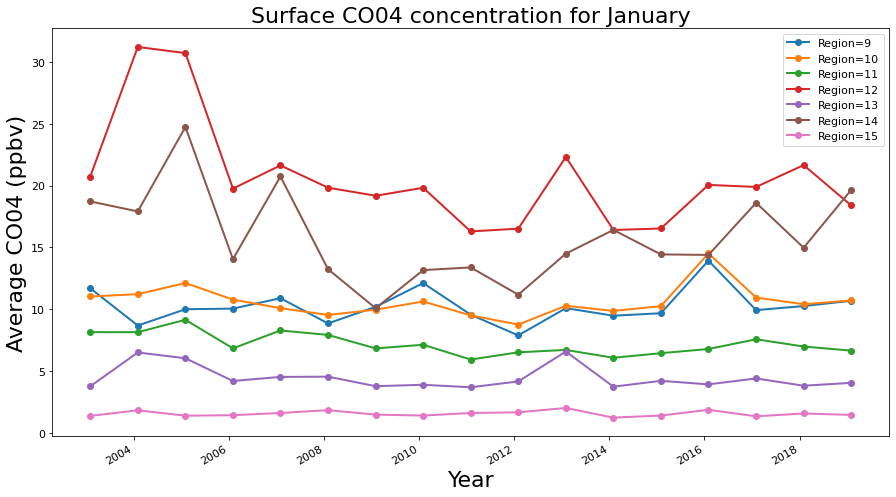

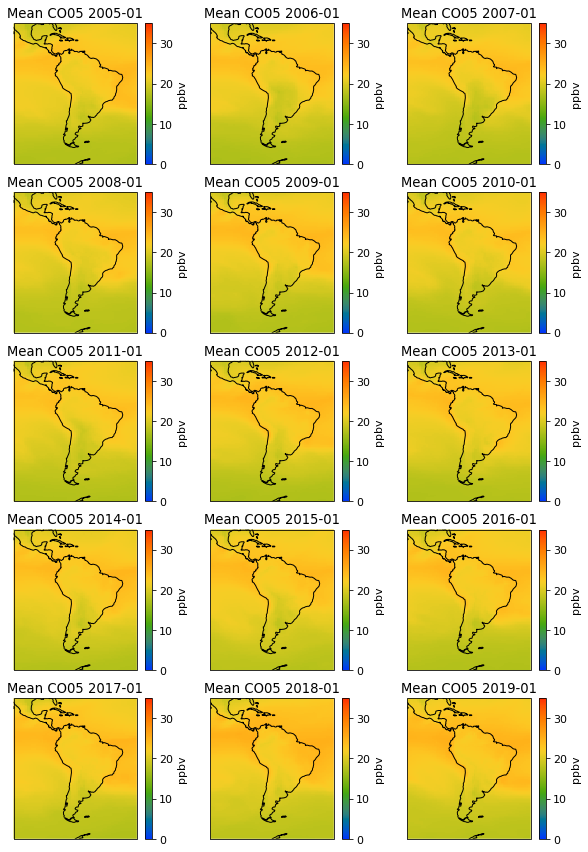

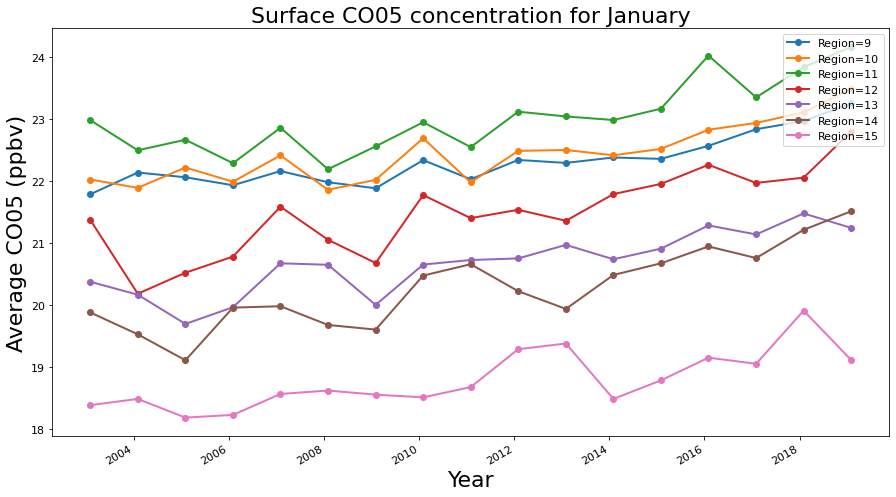

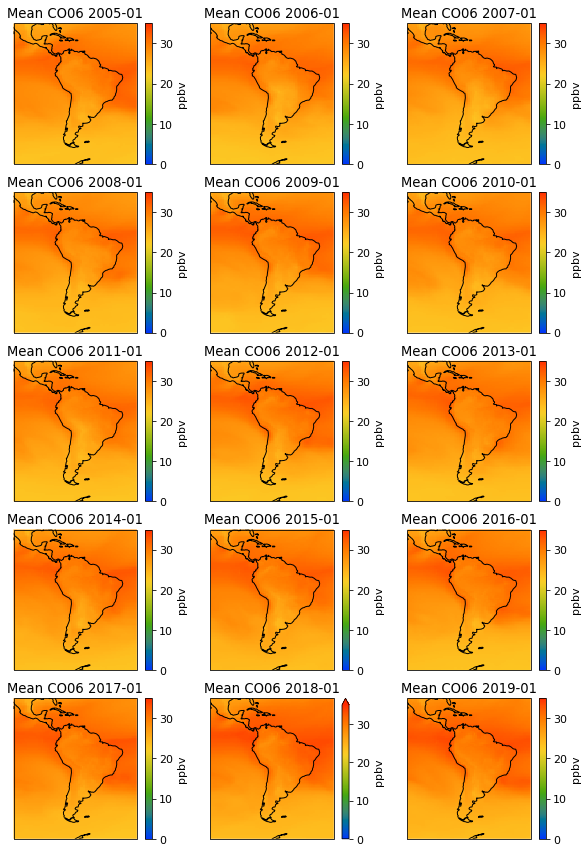

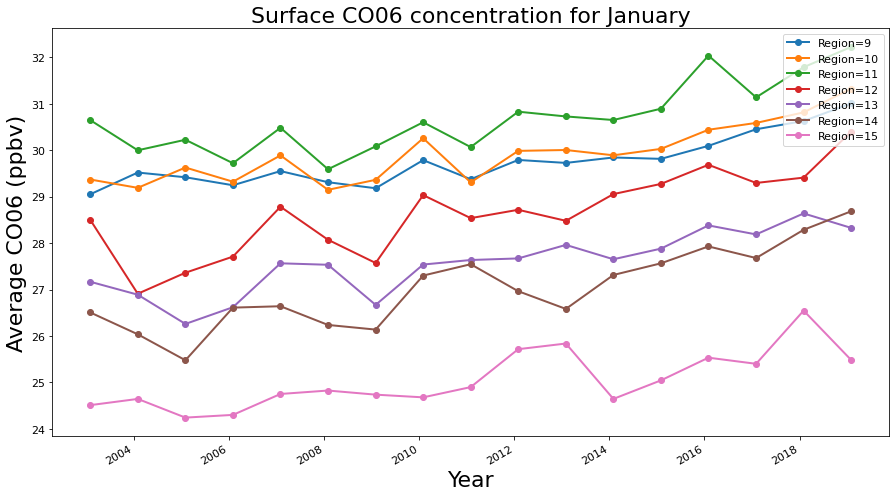

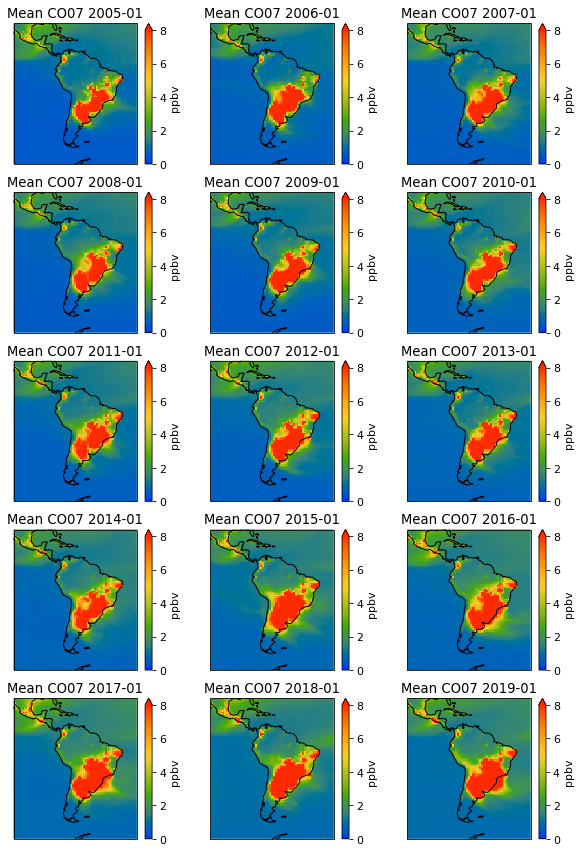

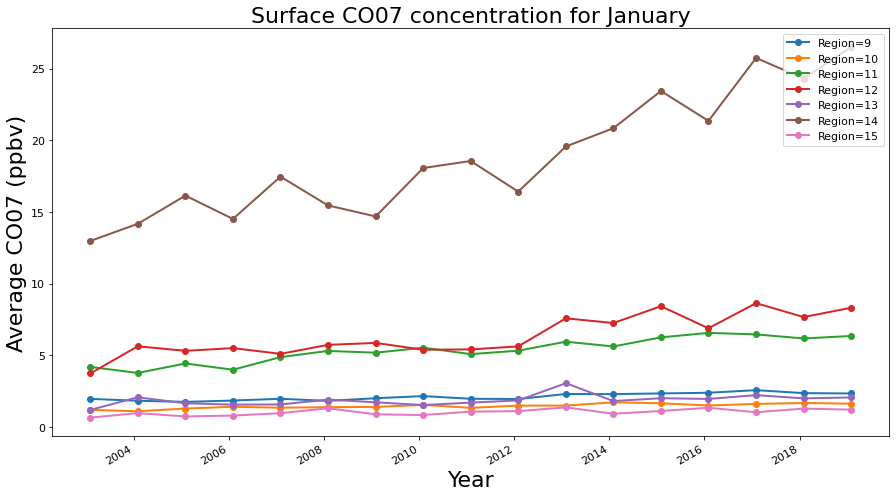

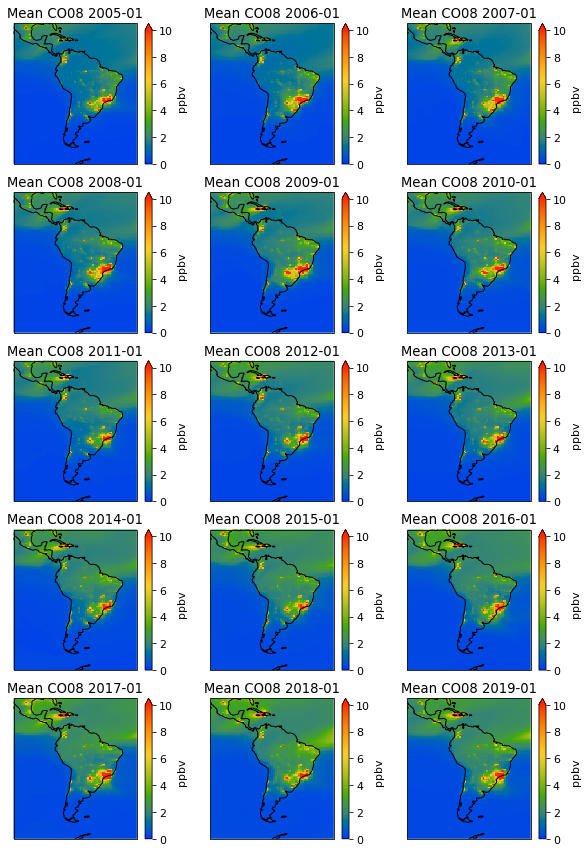

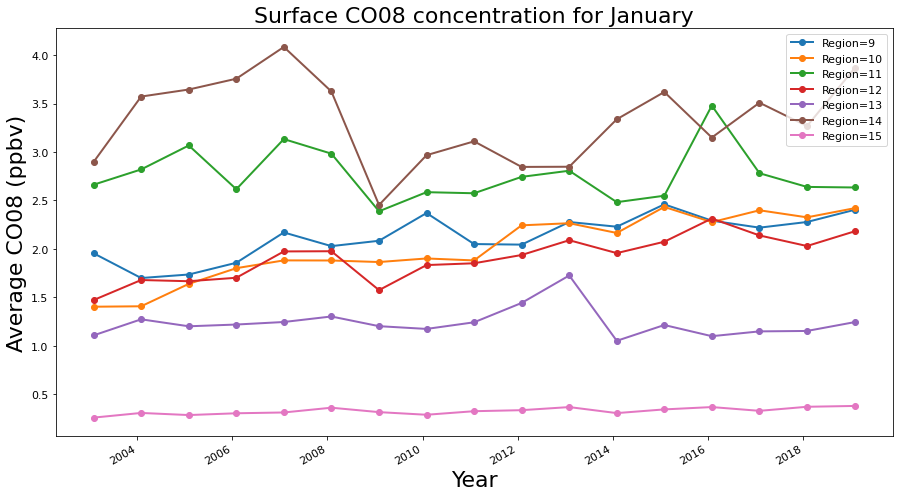

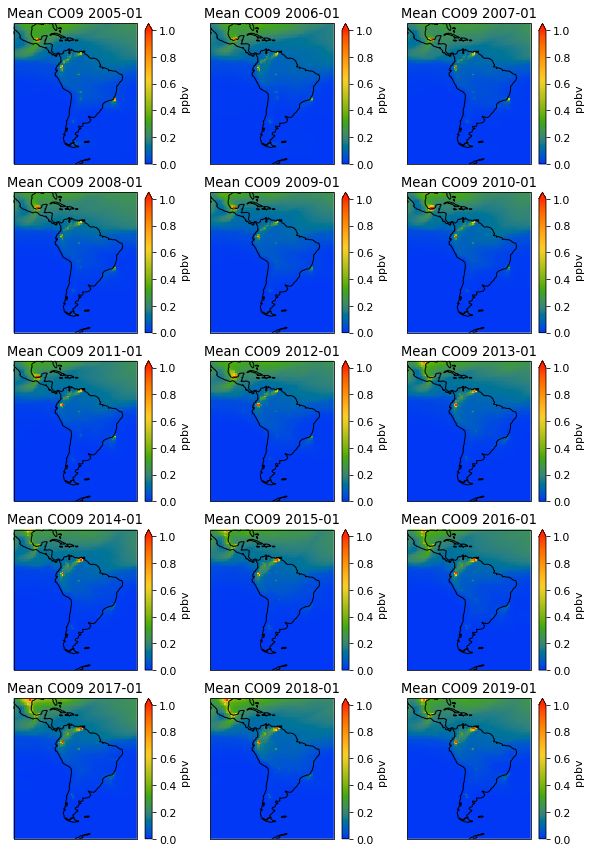

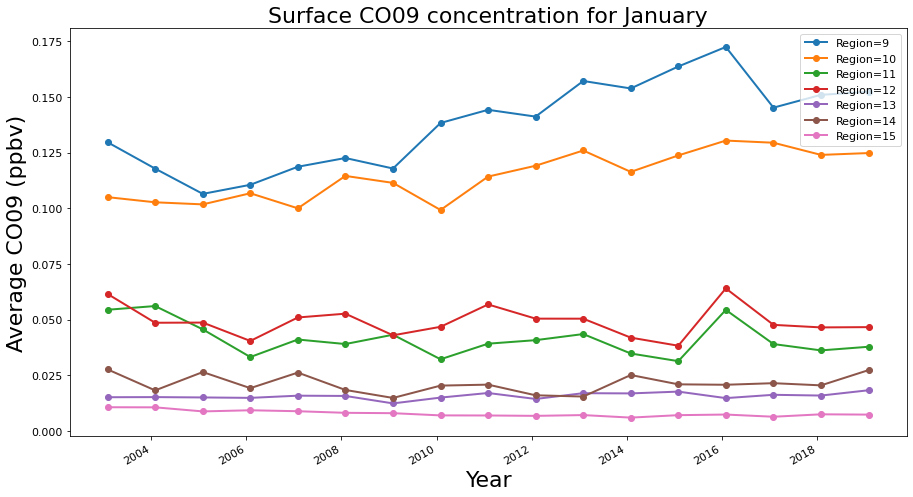

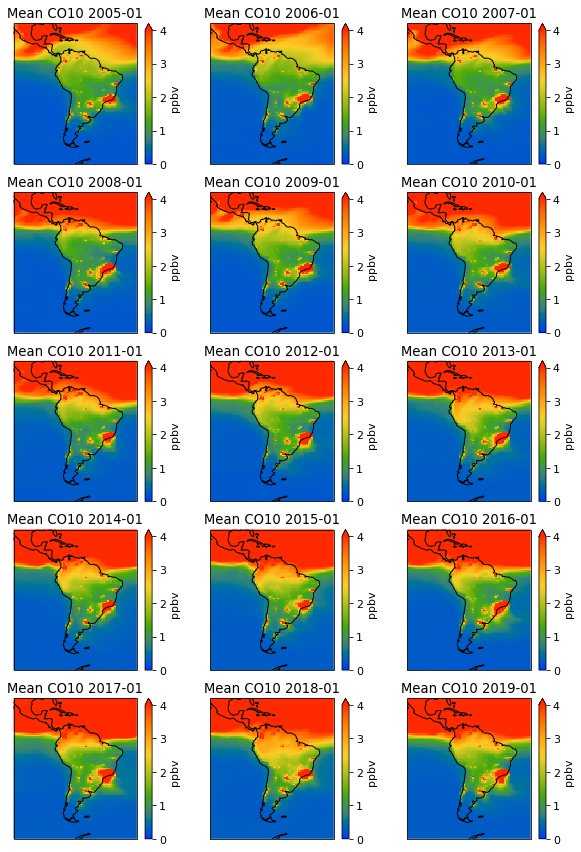

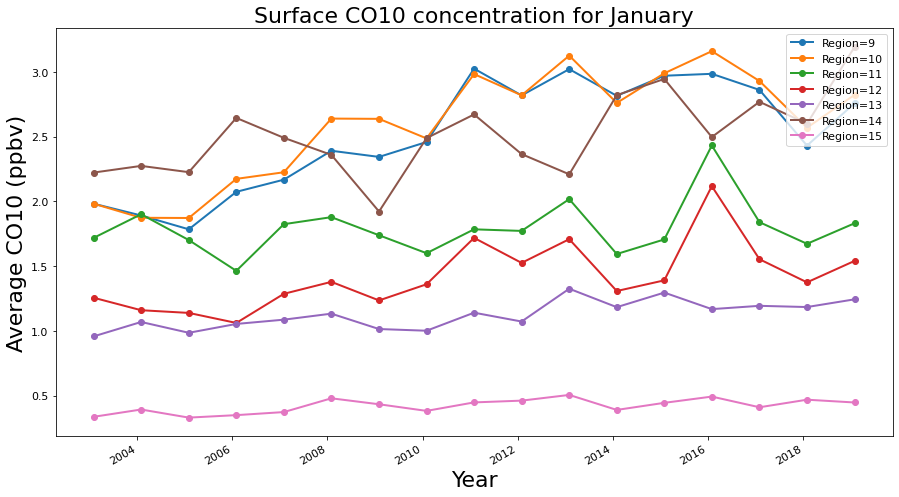

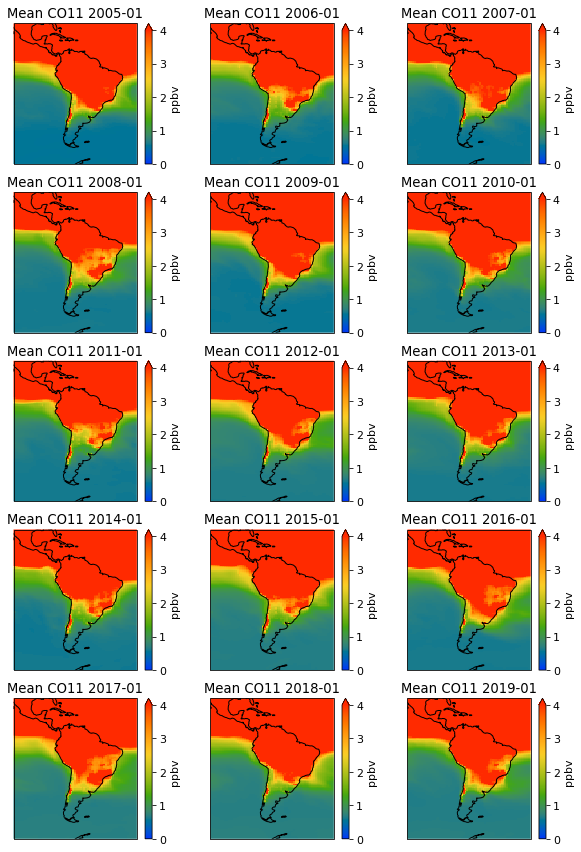

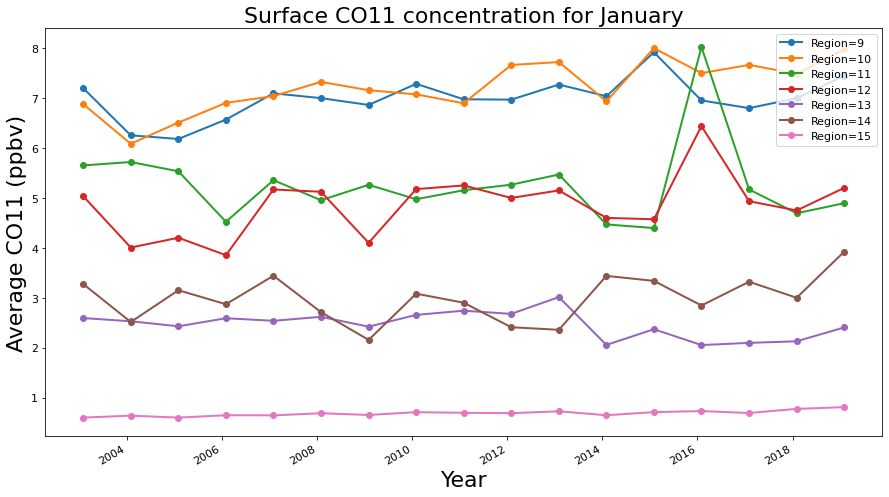

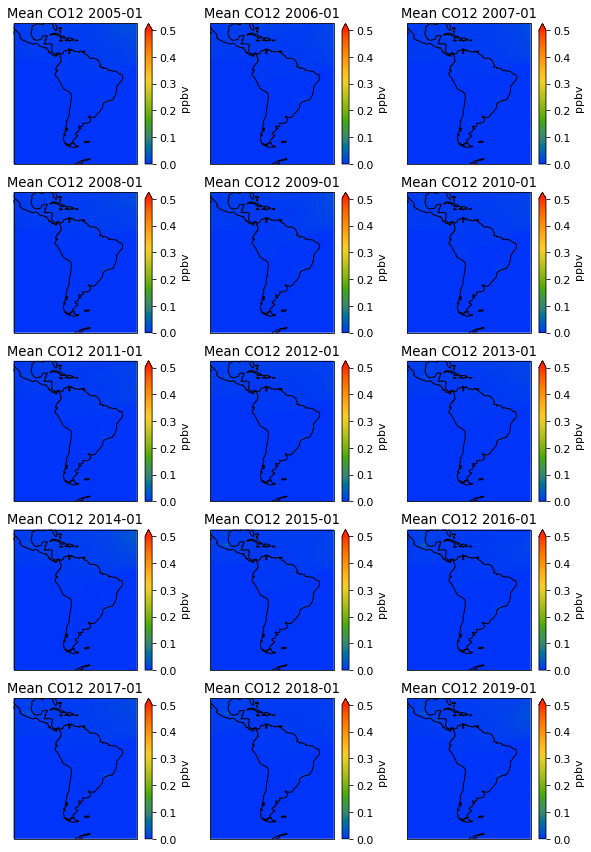

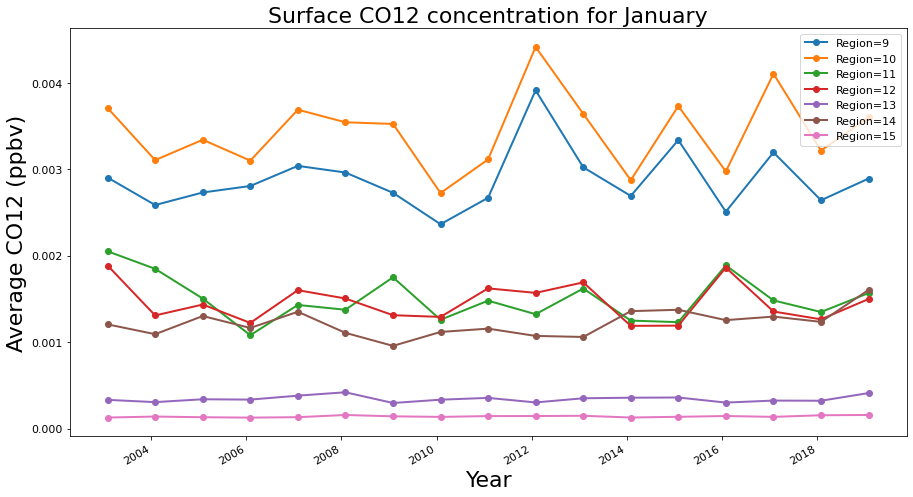

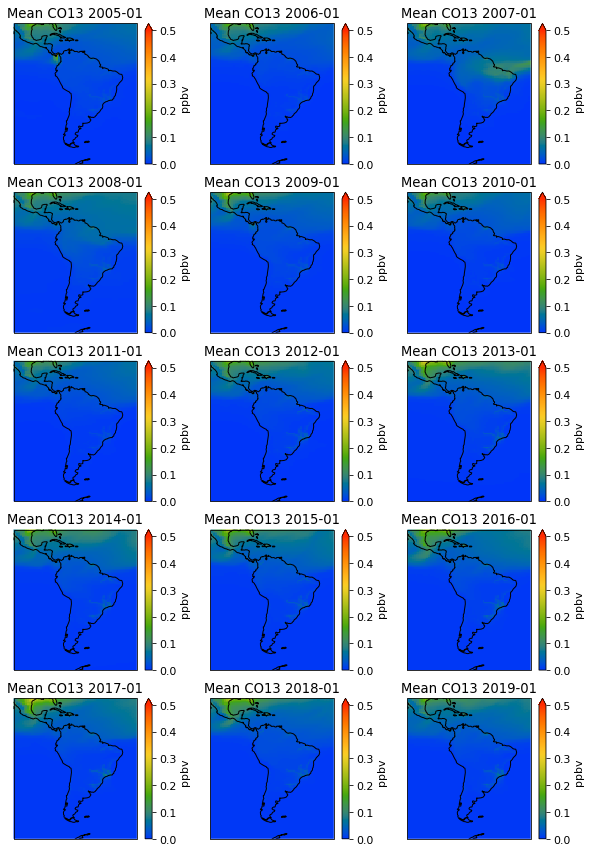

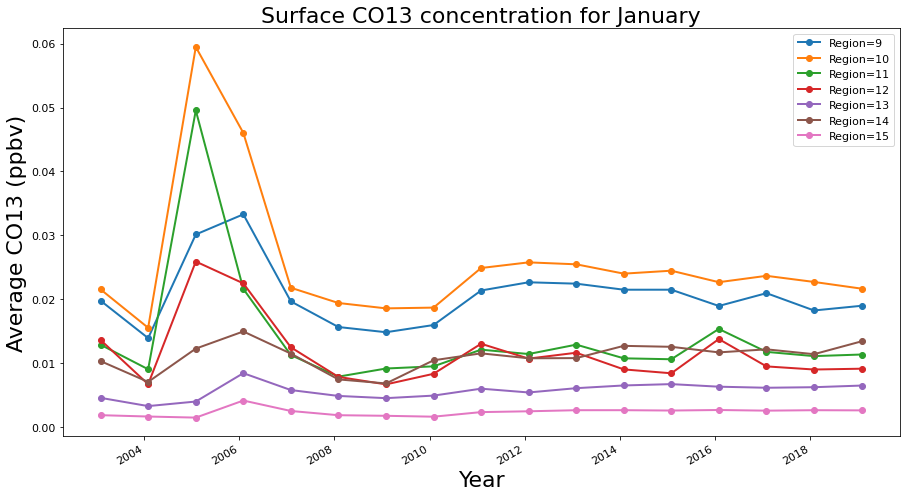

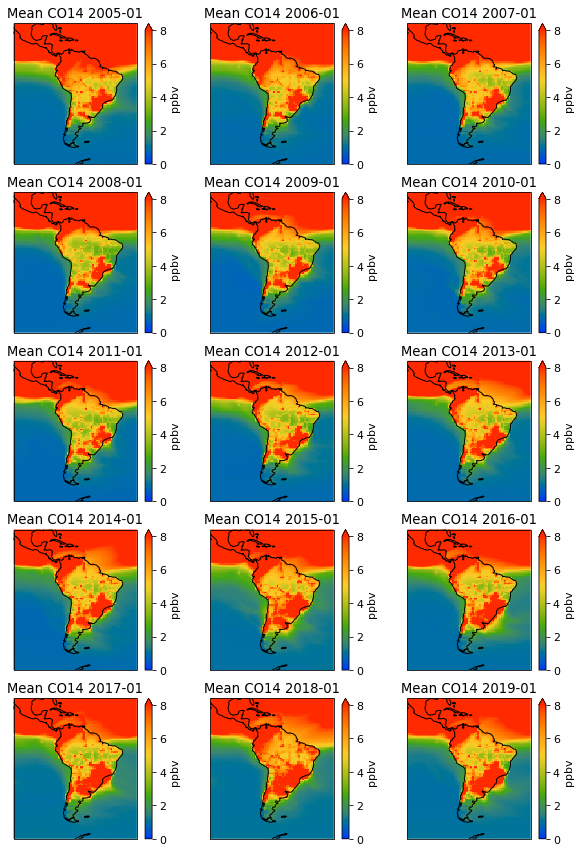

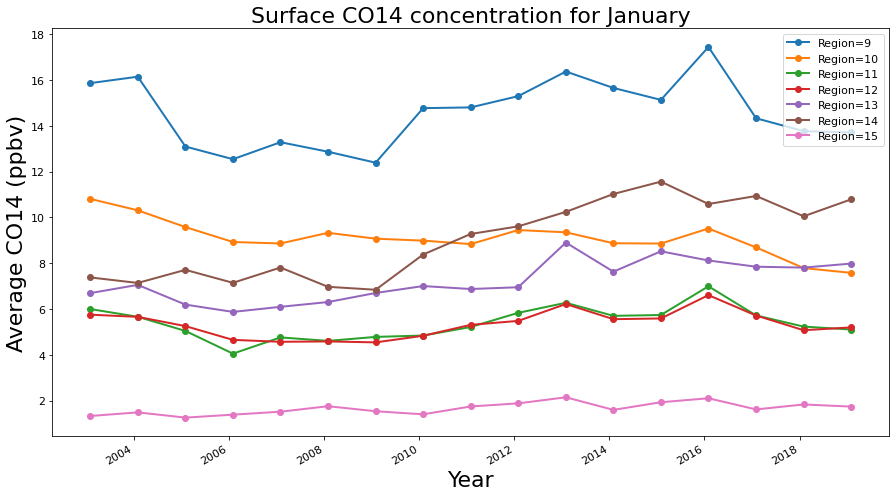

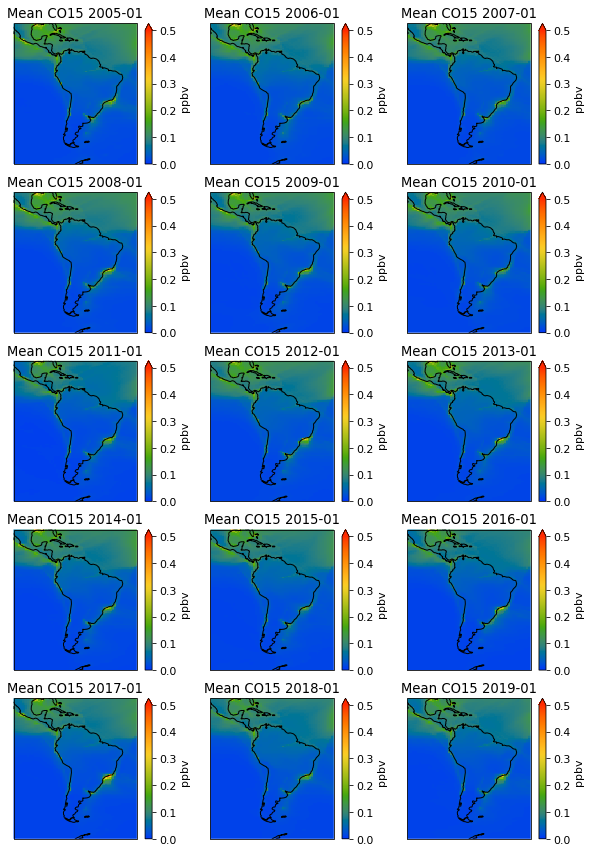

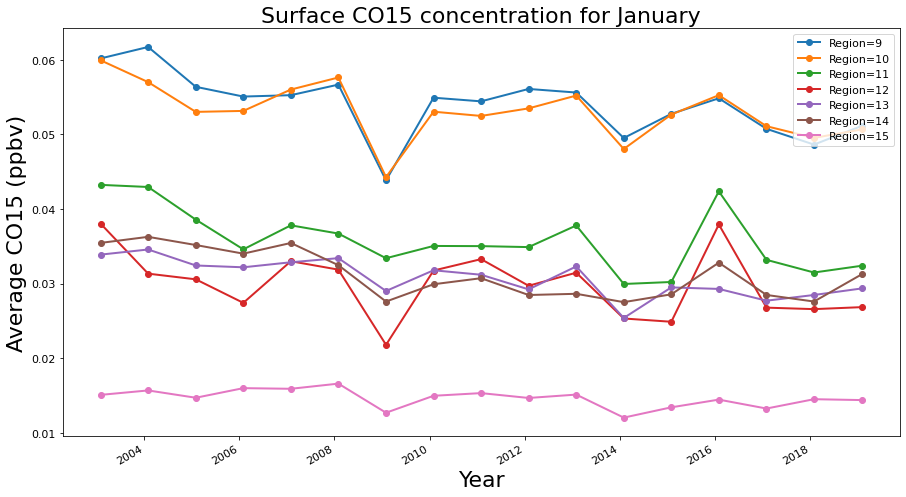

In [ ]:
jan = sorted(glob.glob('*01.nc'))[2:]
ds = xr.open_mfdataset(jan)
landmask = land.mask(ds.lon, ds.lat)
ar6mask = ar6.mask(ds.lon, ds.lat)
#%matplotlib widget
mpl.rcParams['font.size'] = 11


variables = ['NOX', 'CO', 'CH2O', 'O3', 'PM25', 'CO01', 'CO02', 'CO03', 'CO04', 'CO05', 'CO06',
             'CO07', 'CO08', 'CO09', 'CO10', 'CO11', 'CO12', 'CO13', 'CO14', 'CO15']
#variables= ['CO01', 'CO02', 'CO03', 'CO04', 'CO05', 'CO06',
#             'CO07', 'CO08', 'CO09', 'CO10', 'CO11', 'CO12', 'CO13', 'CO14', 'CO15']
max_values = {'NOX':8, 'CO':200, 'CO01':35, 'CO02':30, 'CO03':2.5,'CO04':30, 'CO05':35, 'CO06':35, 'CH2O':10, 'O3':50, 'PM25':50, 'PM10':200,
              'CO07':8, 'CO08':10, 'CO09':1, 'CO10':4, 'CO11':4, 'CO12':0.5, 'CO13':0.5, 'CO14':8, 'CO15':0.5}
unit = {'NOX':'ppbv', 'CO':'ppbv', 'CO01':'ppbv', 'CO02':'ppbv', 'CO03':'ppbv', 'CO04':'ppbv', 'CO05':'ppbv', 'CO06':'ppbv', 'CO07':'ppbv',
        'CO08':'ppbv', 'CO09':'ppbv', 'CO10':'ppbv', 'CO11':'ppbv', 'CO12':'ppbv', 'CO13':'ppbv', 'CO14':'ppbv', 'CO15':'ppbv',  
        'CH2O':'ppbv', 'O3':'ppbv', 'PM25':r'$\mu$g/m$^3$', 'PM10':r'$\mu$g/m$^3$'}
cmap = cc.cm.rainbow
for variable in variables:
    fig, axs = plt.subplots(nrows=5,ncols=3,
                    subplot_kw={'projection': ccrs.PlateCarree()},
                    figsize=(10,15))
    axs=axs.flatten()

    for i in range(0,15):
        axs[i].set_extent((250, 335, -60, 23))
        (ds[variable][i,31,:,:]*1e9).plot(cmap=cmap, ax=axs[i], cbar_kwargs={'label':unit[variable]}, vmax = max_values[variable], vmin=0)
        axs[i].set_title(f'Mean {variable} {2005 + i}-01')
        axs[i].coastlines()
    plt.show()

    #display(CO_region)
    var_region = ds[variable].where(landmask==0).groupby(ar6mask).mean()[:,31,:]
    fig = plt.figure(figsize=(15,7.5))
    for j in range(9,16):
        (var_region[:,j]*1e9).plot.line(marker='o', linewidth=2, label=f'Region={j}')
    plt.title(f'Surface {variable} concentration for January', fontsize=22)
    plt.ylabel(f'Average {variable} ({unit[variable]})', fontsize=22)
    plt.xlabel('Year', fontsize=22)
    plt.legend(loc=1)
    plt.show()

